<a href="https://colab.research.google.com/github/FTCLuis/Mineracao-de-Dados/blob/main/Atv_Luis_Felipe_Laudacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Mineração de Dados**

### Nome: Luis Felipe Laudacio
### Data: 11/10/2024

---


### Tema da Base de Dados: Impacto das Mudanças Climáticas na Agricultura
### Link do Database: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture/data

# **Importação dos Dados**

Importação das bibliotecas para a utilização do notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos mostrar o dataset agora.

In [ ]:
df = pd.read_csv("/content/climate_change_impact_on_agriculture_2024.csv")
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


Vamos verificar agora se existe algum valor nulo na nossa base de dados.

In [ ]:
df.isnull().sum()

,0
Year,0
Country,0
Region,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_%,0


Como não temos valores nulos no nosso dataset, não precisamos fazer um tratamento específico para esses possíveis valores.

In [ ]:
df['Year'] = df['Year'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Crop_Type'] = df['Crop_Type'].astype('category')
df['Average_Temperature_C'] = pd.to_numeric(df['Average_Temperature_C'], errors='coerce')
df['Total_Precipitation_mm'] = pd.to_numeric(df['Total_Precipitation_mm'], errors='coerce')
df['CO2_Emissions_MT'] = pd.to_numeric(df['CO2_Emissions_MT'], errors='coerce')
df['Crop_Yield_MT_per_HA'] = pd.to_numeric(df['Crop_Yield_MT_per_HA'], errors='coerce')
df['Extreme_Weather_Events'] = pd.to_numeric(df['Extreme_Weather_Events'], errors='coerce')
df['Irrigation_Access_%'] = pd.to_numeric(df['Irrigation_Access_%'], errors='coerce')
df['Pesticide_Use_KG_per_HA'] = pd.to_numeric(df['Pesticide_Use_KG_per_HA'], errors='coerce')
df['Fertilizer_Use_KG_per_HA'] = pd.to_numeric(df['Fertilizer_Use_KG_per_HA'], errors='coerce')
df['Soil_Health_Index'] = pd.to_numeric(df['Soil_Health_Index'], errors='coerce')
df['Adaptation_Strategies'] = df['Adaptation_Strategies'].astype('category')
df['Economic_Impact_Million_USD'] = pd.to_numeric(df['Economic_Impact_Million_USD'], errors='coerce')

No nosso código acima, apenas estamos confirmando que todas as nossas colunas são realmente dos tipos de dados que ela deveriam ser, sendo categoricamente ou numeralmente.

In [ ]:
df.describe()

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


Com o describe, vemos apenas as variáveis numéricas.

In [ ]:
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df['Year'].value_counts()

,count
Year,
1999,335
2019,317
1991,314
2012,313
2004,307
2013,305
1994,305
2001,300
1996,295


In [ ]:
df['Country'].value_counts()

,count
Country,
Australia,1032
USA,1032
China,1031
Nigeria,1029
India,1025
Argentina,984
Canada,984
France,978
Russia,961


In [ ]:
df['Region'].value_counts()

,count
Region,
South,754
Northeast,752
North,524
Central,466
Punjab,288
Victoria,283
New South Wales,276
East,273
South West,270


In [ ]:
df['Crop_Type'].value_counts()

,count
Crop_Type,
Wheat,1047
Cotton,1044
Vegetables,1036
Corn,1022
Rice,1022
Sugarcane,995
Fruits,979
Soybeans,958
Barley,952


In [ ]:
df['Adaptation_Strategies'].value_counts()

,count
Adaptation_Strategies,
Water Management,2049
No Adaptation,2024
Drought-resistant Crops,1995
Organic Farming,1975
Crop Rotation,1957


No código acima, estamos apenas contando quantos registros, e quais são os valores existentes com cada uma das colunas.

Separamos em trechos diferentes de código, pois caso deixássemos em apenas um bloco de código, o último trecho de código a ser executado substituiria todas as outras saídas.

# Visualização dos Dados

Vamos primeiro criar um histograma com base na coluna de temperatura média em C° dos locais analisados.

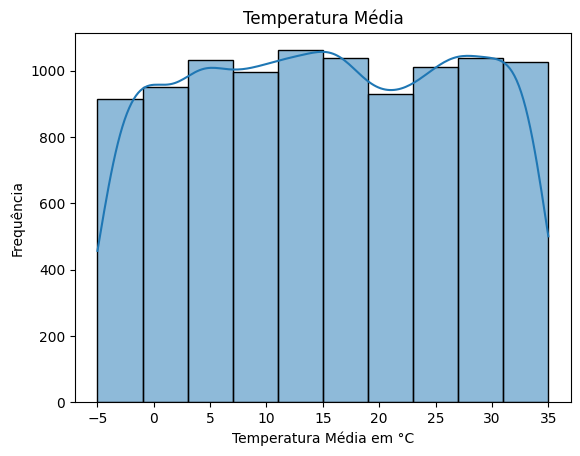

In [ ]:
sns.histplot(df['Average_Temperature_C'], bins=10, kde=True)
plt.title('Temperatura Média')
plt.xlabel('Temperatura Média em °C')
plt.ylabel('Frequência')
plt.show()

Percebemos que a temperatura de `10°C` a `15°C` é o que mais aparece nos dados, com um pouco mais de 1000 registros.

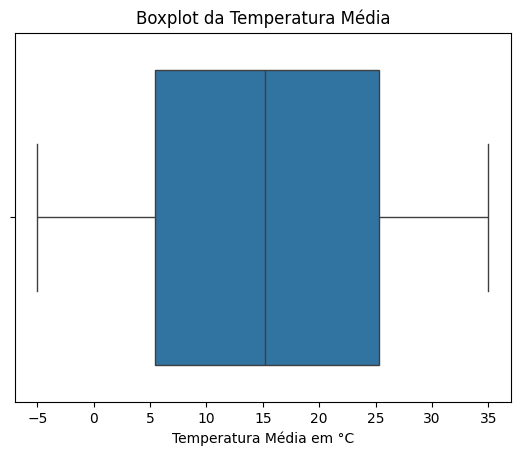

In [ ]:
sns.boxplot(x=df['Average_Temperature_C'])
plt.title('Boxplot da Temperatura Média')
plt.xlabel('Temperatura Média em °C')
plt.show()

Vemos que os dados estão concentrados entre `5°C` a `25°C`, tendo uma dispersão que varia de `-5°C` a `5°C`, e de `25°C` a `35°C`.

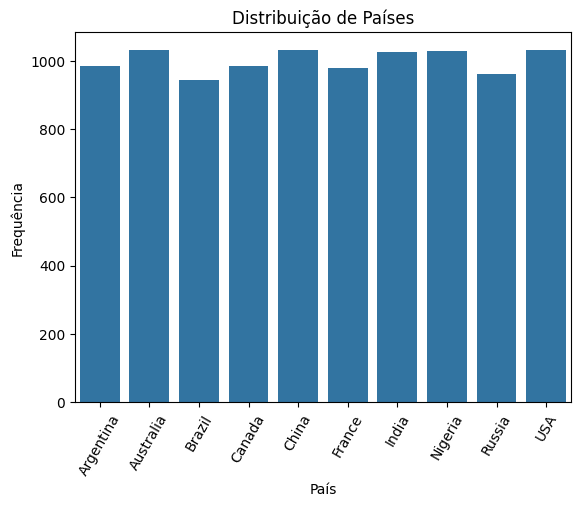

In [ ]:
sns.countplot(x='Country', data=df)
plt.title('Distribuição de Países')
plt.xlabel('País')
plt.ylabel('Frequência')
plt.xticks(rotation=60)
plt.show()

Aqui estamos contando apenas a frequência com que os países aparecem na nossa base de dados.

Vemos que **Australia**, **Estados Unidos**, **China**, **Nigéria** e **Índia** são os que mais aparecem na base.

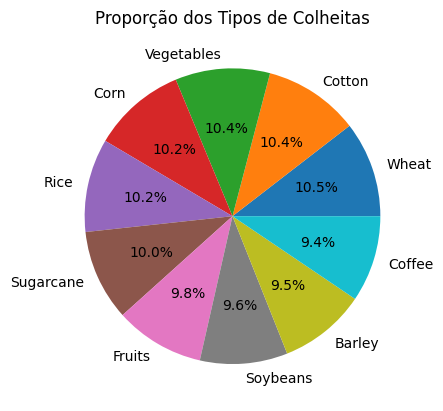

In [34]:
df['Crop_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção dos Tipos de Colheitas')
plt.ylabel('')
plt.show()

Vemos aqui um gráfico de pizza sobre os tipos de colheita que existem na nossa base de dados.

Os que mais aparecem com frequência são:
 - **Trigo** (10,5%);
 - **Vegetais** (10,4%);
 - **Algodão** (10,4%);
 - **Milho** (10,2%);
 - **Arroz** (10,2);

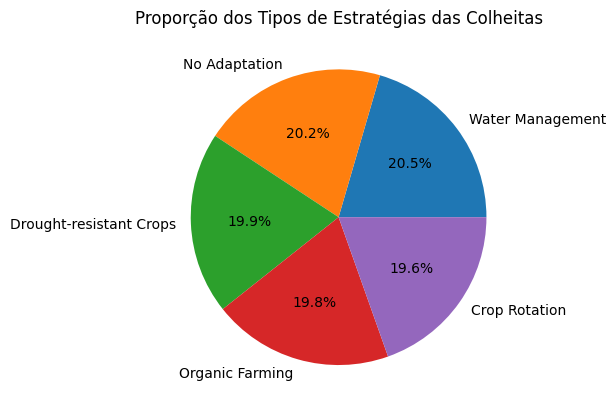

In [118]:
df['Adaptation_Strategies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção dos Tipos de Estratégias das Colheitas')
plt.ylabel('')
plt.show()

Outro exemplo que nos mostra que, num geral, a quantidade de frequência com que os valores categóricos aparecem, está equilibrado. A diferença do que menos aparece (**Drought-Resistant-Crops** (`19,9%`)), e o que mais aparece (**Water Management** (`20.5%`)), é apenas de `0,6%`, que nos mostra um equilíbrio.

Para sabermos quais variáveis categóricas se correlacionam, podemos fazer um gráfico Heatmap entre todas elas.

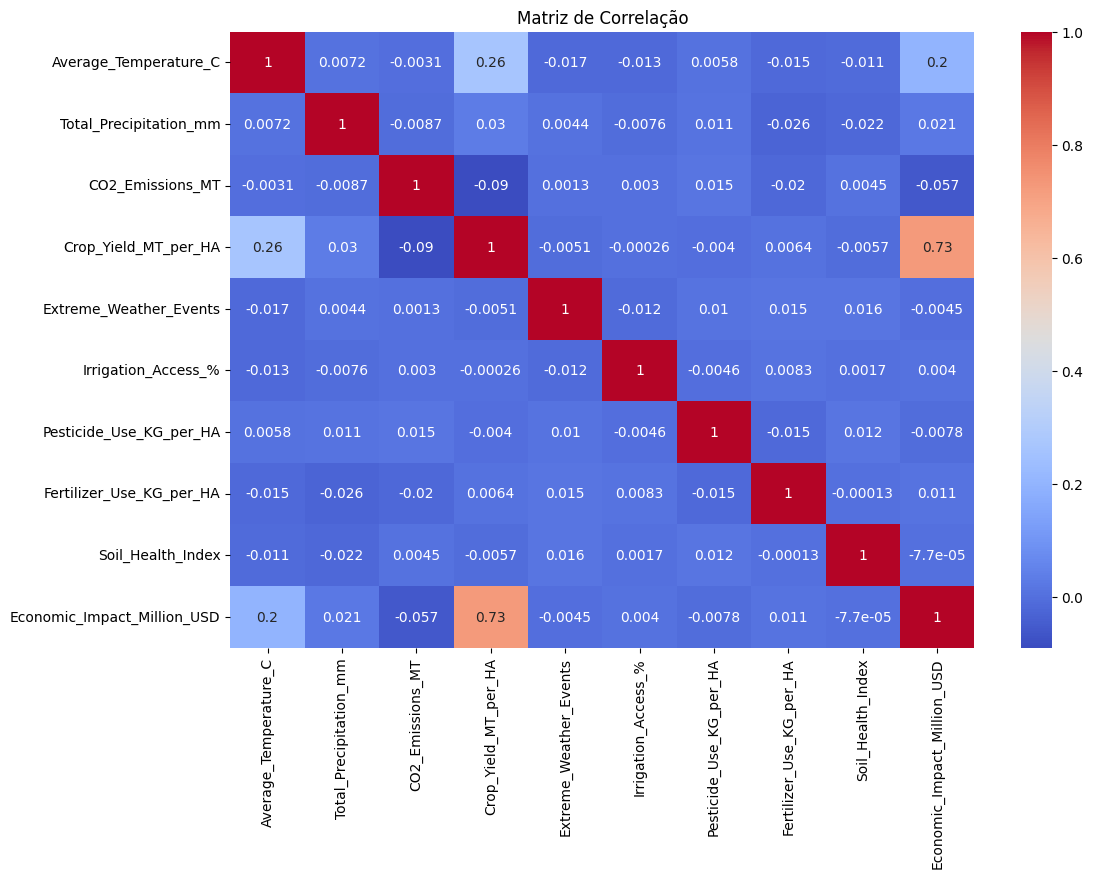

In [114]:
plt.figure(figsize=(12, 8))

df1 = df[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
          'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
          'Soil_Health_Index', 'Economic_Impact_Million_USD', ]]

corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Podemos ver que, dentre todas as variáveis categóricas, temos duas variáveis em específico, que possui 0.73 de correlação, que são:

- Crop_Yield_MT_per_HA (Produtividade Agrícola, com Toneladas Métricas por Hectare);
- Economic_Impact_Million_USD (Impacto Econômico em Milhões de $USD);

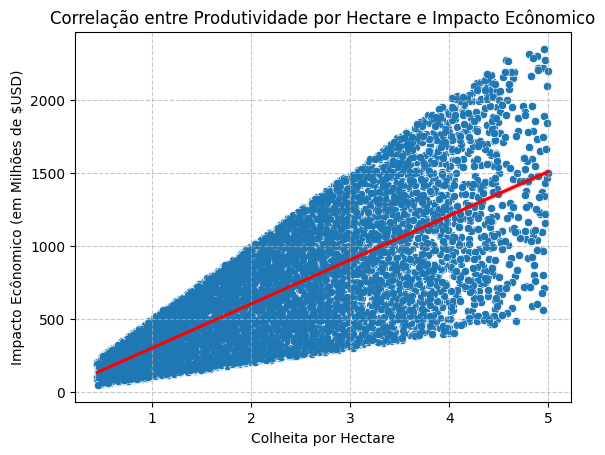

In [116]:
sns.scatterplot(x='Crop_Yield_MT_per_HA', y='Economic_Impact_Million_USD', data=df)
sns.regplot(x='Crop_Yield_MT_per_HA', y='Economic_Impact_Million_USD', data=df, scatter_kws={'s': 4}, line_kws={"color": "red"})
plt.title("Correlação entre Produtividade Agrícola e Impacto Ecônomico")
plt.xlabel('Colheita por Hectare')
plt.ylabel('Impacto Ecônomico (em Milhões de $USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

E fazendo um gráfico de dispersão entre essas duas variáveis, podemos ver que a tendência é de, quantos mais **hectares forem produzidos**, mais **milhões de doláres** serão obtidos.

Podemos perceber com a linha de regressão também, que, as variáveis tem uma *correlação positiva*, ou seja, se uma variável aumentar, a outra também aumenta.

# Perguntas

- 1 - Quais padrões você observou nas variáveis numéricas? (exemplo:  
  distribuição normal, outliers)

*R: Percebi que pelo gráfico boxplot, temos uma tendência de centralização dos dados, com eles se agrpuando mais na metade dos valores, com alguns outliers para as extremidades dos valores.*


- 2 - Como estão distribuídas as variáveis categóricas? Alguma categoria se
destaca em termos de frequência?

*R: Na variável categórica que eu analisei (T**ipos de Colheita**), elas estão distribuídas de forma  uniforme. Por exemplo, no gráfico de pizza, a diferença de porcentagem entre o que menos aparece (café, com `9,4%`) e o que mais aparece (Trigo, com` 10,4%`) é apenas de `1%`, mostrando que os dados estão distribuídos de forma uniforme, sem uma discrepância muito grande.*


- 3 - Você identificou correlações entre variáveis numéricas? Qual pode ser a
relação entre essas variáveis?

*R: Nas variáveis numéricas com maior correlação (Produtividade Agrícola e Impacto Econômico), podemos ver que temos uma tendência de, quanto maior a quantidade de hectare produzido for, maior será o lucro obtido em cima disso.*


- 4 - Com base nos dados, quais são as principais conclusões que você pode
tirar? O que essas conclusões indicam para o contexto do dataset
escolhido?

*R: Num geral, a maioria dos dados não possuem correlação entre si. Com exceção das variáveis já mostradas nos gráficos, podemos concluir que os dados tem uma individualidade neles, que teoricamente, não dependem de outros tipos de dados. Nessa base de dados, vemos também que a maior parte dos dados são numéricos, contendo apenas 5 colunas (de 15) com valores catégoricos. Com relação aos dados catégoricos, das duas colunas colunas analisadas, vemos que existe um equilíbrio bem grande entre elas, tendo pouca diferença na frequência com que elas aparecem.*
